# Data Visualization Exercise

For this exercise, use your creativity and understanding of the different concepts of data visualization.

Create a plot (or a series of subplots) from whatever dataset you choose. As much as possible, please choose a dataset of relevance for visual storytelling. Make the plot using `python`. It doesn't matter if you choose to use `matplotlib` or `seaborn`. 

For the submission:
1. Upload the code that generates the plot to your GitHub repository or to Google Classroom (whichever method you're using for submissions).
2. Upload a png file of the visualization to Google Classroom and write in the Private Comments the caption for the figure you submitted.
3. Make sure to provide the data source in the same folder.

Please make an effort to make it a good and compelling graphic. Choose your colors according to the type of data you're visualizing. Make sure to label everything and avoid clutter. 

As a reference for color choices, you can go to [CARTOColors](https://carto.com/carto-colors/). Simply click on the color map of your choice and it will copy the HEX code of the color.

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime

%pylab inline

Populating the interactive namespace from numpy and matplotlib


### Data Source

Edit this cell to place the direct link to your data source.

You may use the datasets you've downloaded for your project as your submission for this assignment. 

In [6]:
# Read in data
shootings = pd.read_csv('shootings.csv')
shootings.head()

,id,name,date,manner_of_death,armed,age,gender,race,city,state,signs_of_mental_illness,threat_level,flee,body_camera,arms_category
0,3,Tim Elliot,02/01/2015,shot,gun,53.0,M,Asian,Shelton,WA,True,attack,Not fleeing,False,Guns
1,4,Lewis Lee Lembke,02/01/2015,shot,gun,47.0,M,White,Aloha,OR,False,attack,Not fleeing,False,Guns
2,5,John Paul Quintero,03/01/2015,shot and Tasered,unarmed,23.0,M,Hispanic,Wichita,KS,False,other,Not fleeing,False,Unarmed
3,8,Matthew Hoffman,04/01/2015,shot,toy weapon,32.0,M,White,San Francisco,CA,True,attack,Not fleeing,False,Other unusual objects
4,9,Michael Rodriguez,04/01/2015,shot,nail gun,39.0,M,Hispanic,Evans,CO,False,attack,Not fleeing,False,Piercing objects


In [7]:
plt.rcParams['axes.titlesize'] = 18
plt.rcParams['axes.labelsize'] = 14
plt.rcParams['xtick.labelsize'] = 12
plt.rcParams['ytick.labelsize'] = 12

In [8]:
# Perform your data wrangling and descriptive stats to help
shootings.shape

(4895, 15)

In [9]:
# Feature Generation
shootings['date']=pd.to_datetime(shootings['date'])
shootings['year']=pd.to_datetime(shootings['date']).dt.year
shootings['month_name']=shootings['date'].dt.strftime('%B')
shootings['weekdays']=shootings['date'].dt.strftime('%A') 
shootings['age'] = shootings['age'].astype(int)
shootings.head()

,id,name,date,manner_of_death,armed,age,gender,race,city,state,signs_of_mental_illness,threat_level,flee,body_camera,arms_category,year,month_name,weekdays
0,3,Tim Elliot,2015-02-01,shot,gun,53,M,Asian,Shelton,WA,True,attack,Not fleeing,False,Guns,2015,February,Sunday
1,4,Lewis Lee Lembke,2015-02-01,shot,gun,47,M,White,Aloha,OR,False,attack,Not fleeing,False,Guns,2015,February,Sunday
2,5,John Paul Quintero,2015-03-01,shot and Tasered,unarmed,23,M,Hispanic,Wichita,KS,False,other,Not fleeing,False,Unarmed,2015,March,Sunday
3,8,Matthew Hoffman,2015-04-01,shot,toy weapon,32,M,White,San Francisco,CA,True,attack,Not fleeing,False,Other unusual objects,2015,April,Wednesday
4,9,Michael Rodriguez,2015-04-01,shot,nail gun,39,M,Hispanic,Evans,CO,False,attack,Not fleeing,False,Piercing objects,2015,April,Wednesday


## Fatal Killings in all States

In [10]:
shootings_state=shootings['state'].value_counts().to_frame().reset_index().rename(columns={'index':'state','state':'count'}).sort_values(by='count',ascending=False)
shootings_state.head()

,state,count
0,CA,701
1,TX,426
2,FL,324
3,AZ,222
4,CO,168


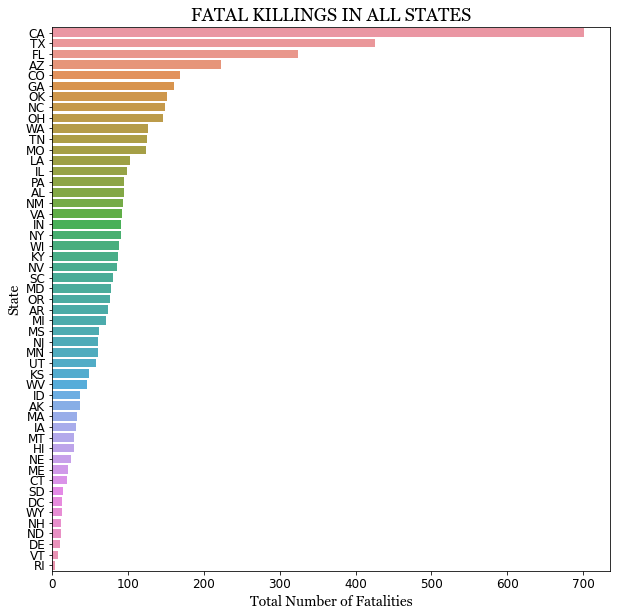

In [11]:
fig = plt.figure(figsize=(10, 10))
ax = sns.barplot(x='count', y='state', data=shootings_state)
ax.set_xlabel('Total Number of Fatalities', fontname='Georgia')
ax.set_ylabel('State', fontname='Georgia')
ax.set_title('FATAL KILLINGS IN ALL STATES', fontname='Georgia')
plt.show()
fig.savefig('Fatal Killings in all States_Cheong_Janine.png')

In [12]:
print("Average number of victims per state is {}.".format(round(shootings_state['count'].mean())))

Average number of victims per state is 96.


## Most dangerous States

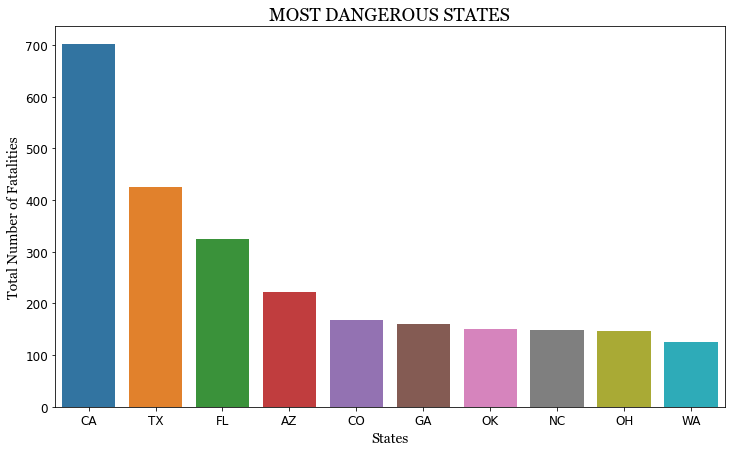

In [13]:
fig = plt.figure(figsize=(12, 7))
ax = sns.barplot(y='count', x='state', data=shootings_state.head(10))
ax.set_xlabel('States', fontname='Georgia')
ax.set_ylabel('Total Number of Fatalities', fontname='Georgia')
ax.set_title('MOST DANGEROUS STATES', fontname='Georgia', fontsize=18)
plt.show()
fig.savefig('Most dangerous States_Cheong_Janine.png')

## Most dangerous Cities

In [14]:
shootings_city=shootings['city'].value_counts().to_frame().reset_index().rename(columns={'index':'city','city':'count'}).sort_values(by='count',ascending=False)
shootings_city.head()

,city,count
0,Los Angeles,78
1,Phoenix,66
2,Houston,51
3,Las Vegas,41
4,San Antonio,40


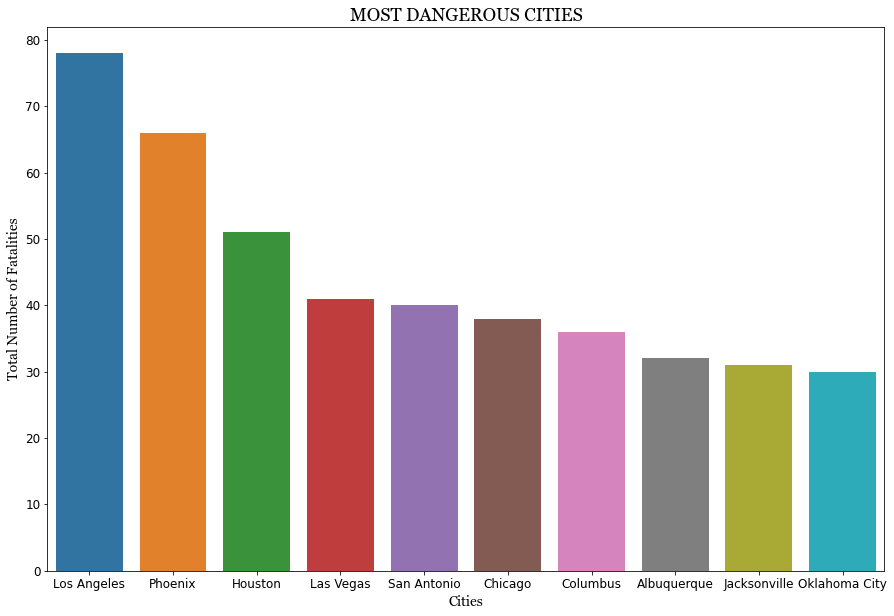

In [15]:
fig = plt.figure(figsize=(15, 10))
ax = sns.barplot(y='count', x='city', data=shootings_city.head(10))
ax.set_xlabel('Cities', fontname='Georgia')
ax.set_ylabel('Total Number of Fatalities', fontname='Georgia')
ax.set_title('MOST DANGEROUS CITIES', fontname='Georgia')
plt.show()
fig.savefig('Most dangerous Cities_Cheong_Janine.png')

## Fatalities in all months from January 2015 to June 2020

In [16]:
shootings_months=shootings['month_name'].value_counts().to_frame().reset_index().rename(columns={'index':'month_name','month_name':'count'}).sort_values(by='count',ascending=False)
shootings_months.head()

,month_name,count
0,January,492
1,March,468
2,May,459
3,July,414
4,April,409


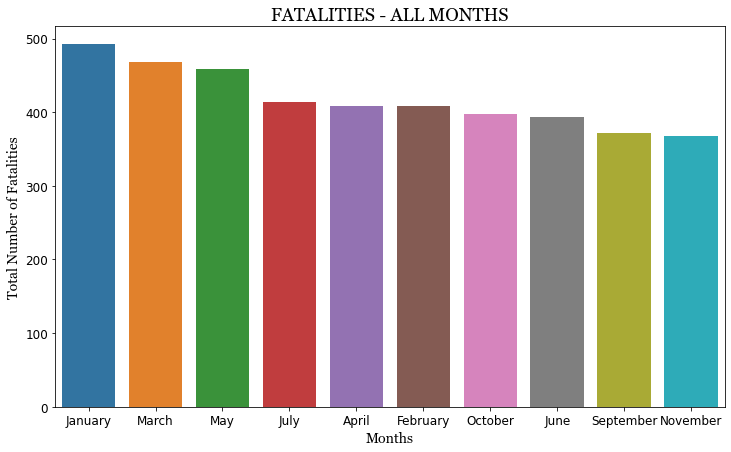

In [17]:
fig = plt.figure(figsize=(12, 7))
ax = sns.barplot(y='count', x='month_name', data=shootings_months.head(10))
ax.set_xlabel('Months', fontname='Georgia')
ax.set_ylabel('Total Number of Fatalities', fontname='Georgia')
ax.set_title('FATALITIES - ALL MONTHS', fontname='Georgia')
plt.show()
fig.savefig('Fatalities in all months_Cheong_Janine.png')

## Gender proportion

In [18]:
shootings_gender=shootings.groupby(['year','gender']).agg('count')['id'].to_frame(name='count').reset_index()
shootings_gender_male=shootings_gender.loc[shootings_gender['gender']=='M']
shootings_gender_female=shootings_gender.loc[shootings_gender['gender']=='F']
shootings_gender.head()

,year,gender,count
0,2015,F,41
1,2015,M,924
2,2016,F,38
3,2016,M,866
4,2017,F,40


<Figure size 864x504 with 0 Axes>

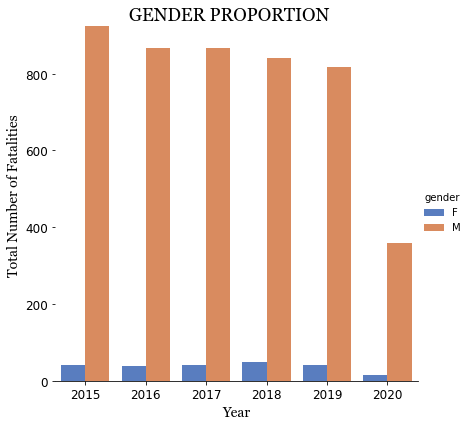

In [19]:
fig = plt.figure(figsize=(12, 7))
ax = sns.catplot(x="year", y="count", hue="gender", data=shootings_gender,
                height=6, kind="bar", palette="muted")

ax.despine(left=True)
ax.set_xlabels('Year', fontname='Georgia')
ax.set_ylabels('Total Number of Fatalities', fontname='Georgia')
ax.fig.suptitle('GENDER PROPORTION', fontname='Georgia', fontsize=18) 
plt.show()
